Pokretanje: GA 0
Generacija 0 -> prilagodjenost najboljeg 0.4451547668 --- prosecna pr. pop 17.1904670826 
Generacija 1 -> prilagodjenost najboljeg 0.069901989 --- prosecna pr. pop 3.6370569322 
Generacija 2 -> prilagodjenost najboljeg 0.0163321658 --- prosecna pr. pop 1.0804099497 
Generacija 3 -> prilagodjenost najboljeg 0.0153014302 --- prosecna pr. pop 0.5075107715 
Generacija 4 -> prilagodjenost najboljeg 0.000839873 --- prosecna pr. pop 0.2118324444 
Generacija 5 -> prilagodjenost najboljeg 0.0006387964 --- prosecna pr. pop 0.0963958726 
Generacija 6 -> prilagodjenost najboljeg 0.0006335447 --- prosecna pr. pop 0.017204267 
Generacija 7 -> prilagodjenost najboljeg 0.0001430718 --- prosecna pr. pop 0.0034098807 
Generacija 8 -> prilagodjenost najboljeg 1.0895e-06 --- prosecna pr. pop 0.0006902916 
Generacija 9 -> prilagodjenost najboljeg 1.0895e-06 --- prosecna pr. pop 0.0002183381 
Generacija 10 -> prilagodjenost najboljeg 1.0895e-06 --- prosecna pr. pop 6.24075e-05 
Generacija 1

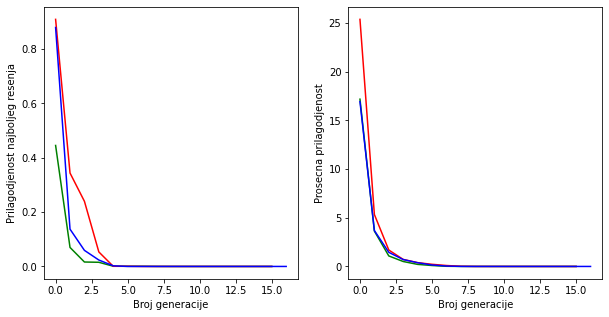

In [104]:
import random
import sys
import math
import matplotlib.pyplot as plt 

# konfiguracija parametara
max_iter = 500
mutacije = 0.2
ponavljanja = 3
domen = [-10,10]
pop_vel = 150
npop_vel = 150
kvantizacija = 10
turnir_vel = 3

# funkcija za minimizaciju - ujedno i fitnes f-ja
def levi13(hromozom): return round(math.pow(math.sin(3*math.pi*hromozom[0]), 2) + math.pow(hromozom[0] - 1, 2)*(1 + math.pow(math.sin(3*math.pi*hromozom[1]), 2)) + math.pow(hromozom[1] - 1, 2)*(1 + math.pow(math.sin(2*math.pi*hromozom[1]), 2)),kvantizacija)

# mutacija - normalna raspodela (gaus)
def mutiraj(hromozom, rate, opseg):
    if random.random() < rate:
        for i in range(len(hromozom)):
            hromozom[i] = round(clamp(hromozom[i] + random.gauss(0,1),-10,10),kvantizacija)
    return hromozom

# funkcija koja vodi racuna o tome da mutacijama ili ukrstanjem ne izadjemo iz domena
def clamp(n, minn, maxn):
    if n < minn:
        return minn
    elif n > maxn:
        return maxn
    else:
        return n

# genetski algoritam
def genetski():
    # graf  
    x1 = []
    y1 = []
    x2 = []
    y2 = []
    x3 = []
    y3 = []
    y11 = []
    y22 = []
    y33 = []
    # turnirska selekcija - argumenti su funkcija troška, rešenje, populacija i veličina turnira
    def turnir(fja, pop, vel):
        z = []
        while len(z) < vel:
            z.append(random.choice(pop))
        najbolji = None
        najbolji_f = None
        for e in z:
            ff = fja(e)
            if najbolji is None or ff < najbolji_f:
               najbolji_f = ff
               najbolji = e
        return najbolji
    
    # Redklif
    def ukrsti(h1, h2):
        beta = random.random()
        l = [[], []]
        for i in range(len(l)):
            for j in range(2):
                if(i == 0):l[i].append(round(clamp(beta*h1[j]+(1-beta)*h2[j],-10,10),kvantizacija))
                if(i == 1):l[i].append(round(clamp(beta*h2[j]+(1-beta)*h1[j],-10,10),kvantizacija))        
        return l
    
    outfile = sys.stdout
    s_trosak = 0
    s_iteracija = 0
    best_ever_sol = None
    best_ever_f = None
    test_vel = 2
    # pokretanja genetskog algoritma
    for k in range(ponavljanja):
        print('Pokretanje: GA', k, file=outfile)
        best = None
        best_f = None
        t = 0
        # generisanje populacije pomoću zadatog opsega realnih vrednosti
        pop = [[random.uniform(*domen) for i in range(test_vel)] for j in range(pop_vel)]
        # ponavljamo dok ne postignemo maksimum iteracija ili dok trošak ne postane 0
        while best_f != 0 and t < max_iter:
            n_pop = pop[:]
            while len(n_pop) < pop_vel + npop_vel:
                h1 = turnir(levi13, pop, 3)
                h2 = turnir(levi13, pop, 3)
                h3, h4 = ukrsti(h1, h2)
                mutiraj(h3, mutacije, domen)
                mutiraj(h4, mutacije, domen)
                n_pop.append(h3)
                n_pop.append(h4)
            pop = sorted(n_pop, key=lambda x : levi13(x))[:pop_vel]
            f = levi13(pop[0])
            if best_f is None or best_f > f:
                best_f = f
                best = pop[0]
            prosecna_prilagodjenost_pop = round(sum(map(levi13,pop))/pop_vel,kvantizacija)
            print('Generacija {} -> prilagodjenost najboljeg {} --- prosecna pr. pop {} '.format(t,f,prosecna_prilagodjenost_pop),file=outfile)
            if k == 0:
              x1.append(t)
              y1.append(f)
              y11.append(prosecna_prilagodjenost_pop)
            if k == 1:
              x2.append(t)
              y2.append(f)
              y22.append(prosecna_prilagodjenost_pop)              
            if k == 2:
              x3.append(t)
              y3.append(f)
              y33.append(prosecna_prilagodjenost_pop)                          
            t += 1
        s_trosak += best_f
        s_iteracija += t
        # ako smo našli bolji od prethodnog, ažuriramo najbolje rešenje
        if best_ever_f is None or best_ever_f > best_f:
            best_ever_f = best_f
            best_ever_sol = best
        print(t, best, best_f, file=outfile)
#                print(t, best, best_f)
    # na kraju svih izvršavanja izračunavamo srednji trošak i srednji broj iteracija
    s_trosak /= ponavljanja
    s_iteracija /= ponavljanja

    print('\nSrednji trosak: %g' % s_trosak, file=outfile)
    print('Srednji broj iteracija: %.2f' % s_iteracija, file=outfile)
    print('Najbolje resenje: %s' % best_ever_sol, file=outfile)
    print('Najbolji trosak: %g' % best_ever_f, file=outfile)

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

    axes[1].plot(x1, y11, color='green')
    axes[1].plot(x2, y22, color='red')
    axes[1].plot(x3, y33, color='blue')    

    axes[0].plot(x1, y1, color='green')
    axes[0].plot(x2, y2, color='red')
    axes[0].plot(x3, y3, color='blue')
    axes[0].set_xlabel('Broj generacije') 
    axes[0].set_ylabel('Prilagodjenost najboljeg resenja') 

    axes[1].set_xlabel('Broj generacije') 
    axes[1].set_ylabel('Prosecna prilagodjenost') 
    
# function to show the plot 
    plt.show() 


genetski()















